In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


- Binary Classification (cat or dog) #One label of each
- Multi-class Classification (label of foods) #One label of each but multiple available labels
- Multi-label Classification (tags for articles) #Multiple labels for each
 
Outputs for data labels is the probablity of each label being true.
 
[0.1, 0.3, 0.6] #This means that the first label is 10% true, the second is 30% true, and the third is 60% true.

## Data

In [31]:
from sklearn.datasets import make_circles

#Make 1000 data points
n = 1000
X, y = make_circles(n_samples=n, shuffle=True, noise=0.1, random_state=None, factor=0.2)

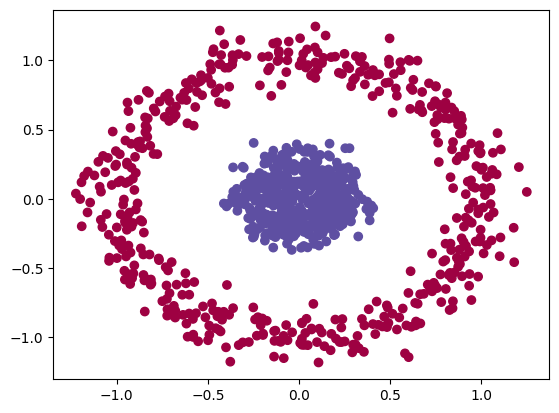

In [32]:
#Plot x and y with y determined by color
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()


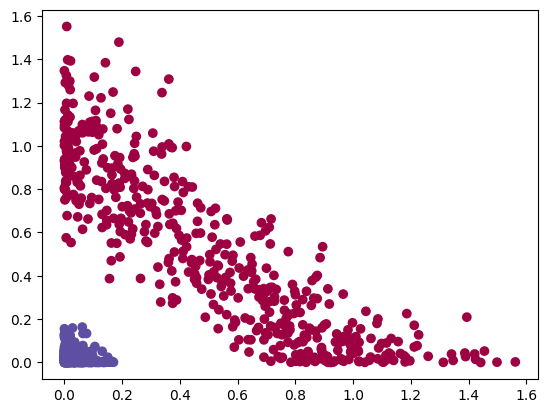

In [33]:
#Square the data for linear separability
X_squared = np.square(X)

plt.scatter(X_squared[:,0], X_squared[:,1], c=y, cmap=plt.cm.Spectral)


### Input and output shapes

In [34]:
input = X.shape[1]
#if unique values are 2 (binary), then subtract 1, else don't subtract values (multi-class)
output = np.unique(y).shape[0]-1 if np.unique(y).shape[0] == 2 else np.unique(y).shape[0]

print(f'Input : {input} Output : {output}')

Input : 2 Output : 1


In [35]:
## Convert to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [36]:
#Check the first 5 values
X[:5], y[:5]

(tensor([[-0.7126,  0.5624],
         [ 0.0405,  0.9563],
         [ 0.0903,  0.1428],
         [ 0.0905,  0.2483],
         [ 0.9828, -0.5618]]),
 tensor([0., 0., 1., 1., 0.]))

### Split Data into Train and Test

In [37]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## Build the Model

In [39]:
import torch
from torch import nn

#1. Device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 2. Define the model

1. Subclasses nn.Module
2. Create 2 nn.linear()
3. Define a forward
4. Instatiate an instance of our model

In [40]:
#1. Construct a model thqt subclasses nn.Module
class CircleModel_v0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create two linear layers
        
        #2. Create 2 nn.Lienar layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2,out_features = 64)
        self.layer_2 = nn.Linear(in_features = 64,out_features = 1)
    
    #3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

#4. Instantiate the model
model_0= CircleModel_v0().to(device)
model_0
        

CircleModel_v0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [189]:
# Replicate the model abouve using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 4, out_features = 64),
    #nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 1)
).to(device)
model_0

loss_fn = nn.BCEWithLogitsLoss() #Binary cross entropy with logits
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [103]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2626, -0.2823],
                      [-0.0685,  0.6714],
                      [-0.0510,  0.3326],
                      [-0.2034,  0.5691],
                      [ 0.2341, -0.5476]])),
             ('0.bias', tensor([0.0165, 0.1009, 0.3026, 0.0831, 0.0396])),
             ('2.weight',
              tensor([[-0.2241,  0.0529, -0.3947, -0.4064,  0.1213]])),
             ('2.bias', tensor([0.0059]))])

### Make Predictions

In [43]:
untrained_preds = model_0(X_test.to(device))
print(f'Length of Predictions : {len(untrained_preds)}')
print(f'Shape of Predictions : {untrained_preds.shape}')
print(f'Length of Targets : {len(y_test)}')
print(f'Shape of Targets : {y_test.shape}')

Length of Predictions : 200
Shape of Predictions : torch.Size([200, 1])
Length of Targets : 200
Shape of Targets : torch.Size([200])


In [133]:
#loss_fn = nn.BCEWithLogitsLoss() #Binary cross entropy with logits
#optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [98]:
def accuracy_fn(preds, labels):
    correct = torch.eq(labels, preds).sum().item()
    #rounded_preds = torch.round(torch.sigmoid(preds))
    #correct = (rounded_preds == labels).float()
    #print(correct)
    acc = (correct / len(preds))*100
    return acc

In [75]:
print(f'Logit (Output): \n{untrained_preds[:5]}')
print(f'Sigmoid (Probability): \n{torch.sigmoid(untrained_preds[:5])}')
print(f'Precition : \n{torch.round(torch.sigmoid(untrained_preds[:5]))}')
print(f'Actual : \n{y_test[:5]}')
#Check for equality
print(f'Equality Check: {torch.eq(torch.round(torch.sigmoid(untrained_preds[:5])).squeeze(), y_test[:5])}')
print(f'Accuracy: {accuracy_fn(torch.round(torch.sigmoid(untrained_preds)).squeeze(), y_test.to(device))}')

Logit (Output): 
tensor([[ 0.0285],
        [-0.1491],
        [-0.0347],
        [ 0.3948],
        [-0.0547]], grad_fn=<SliceBackward0>)
Sigmoid (Probability): 
tensor([[0.5071],
        [0.4628],
        [0.4913],
        [0.5974],
        [0.4863]], grad_fn=<SigmoidBackward0>)
Precition : 
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)
Actual : 
tensor([1., 0., 0., 0., 1.])
Equality Check: tensor([ True,  True,  True, False, False])
Accuracy: 47.5


### Training Loop

In [145]:
X_train_poly = torch.cat((X_train, X_train**2), dim=1)
print(X_train_poly.shape)
print(X_train_poly[:5])
X_test_poly = torch.cat((X_test, X_test**2), dim=1)

torch.Size([800, 4])
tensor([[ 0.8452,  0.4106,  0.7144,  0.1686],
        [ 0.1701,  0.3051,  0.0289,  0.0931],
        [-0.1563,  0.0695,  0.0244,  0.0048],
        [-0.2287, -0.2198,  0.0523,  0.0483],
        [-0.1279,  0.1961,  0.0164,  0.0385]])


In [161]:
def plot_decision_boundary_mma(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    #print(f'Prior to Transformation: {X_to_pred_on.shape}')
    #print(f'first 5 observations: {X_to_pred_on[:5]}')
    
    if X.shape[1] > 2: #Polynomial Features
        X_to_pred_on = torch.cat((X_to_pred_on, X_to_pred_on ** 2), 1)
        
    #print(f'After to Transformation: {X_to_pred_on.shape}')
    #print(f'first 5 observations: {X_to_pred_on[:5]}')
    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Epoch : 0 Loss : 0.6633105278015137 Accuracy : 50.125
Epoch : 0 Loss : 0.6633105278015137 Accuracy : 50.125


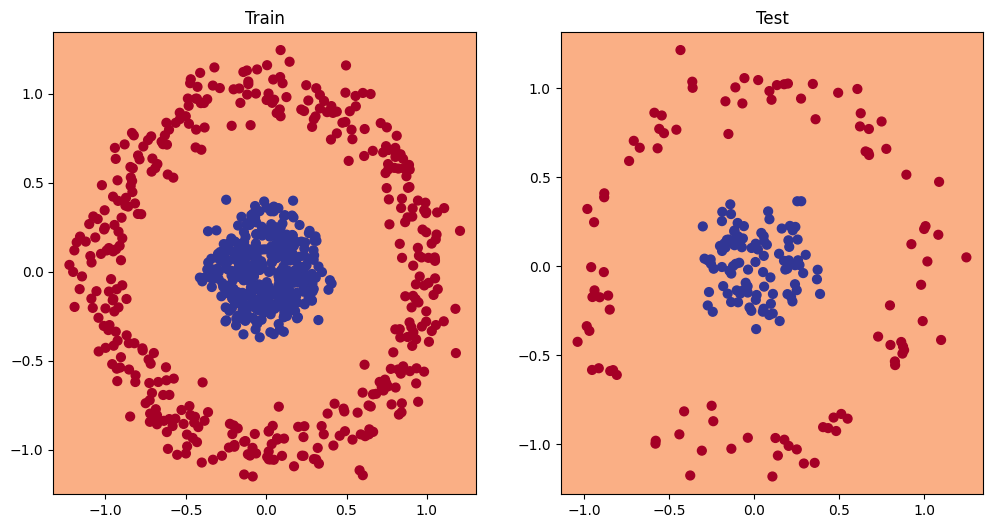

Epoch : 100 Loss : 0.52406907081604 Accuracy : 100.0
Epoch : 100 Loss : 0.52406907081604 Accuracy : 100.0


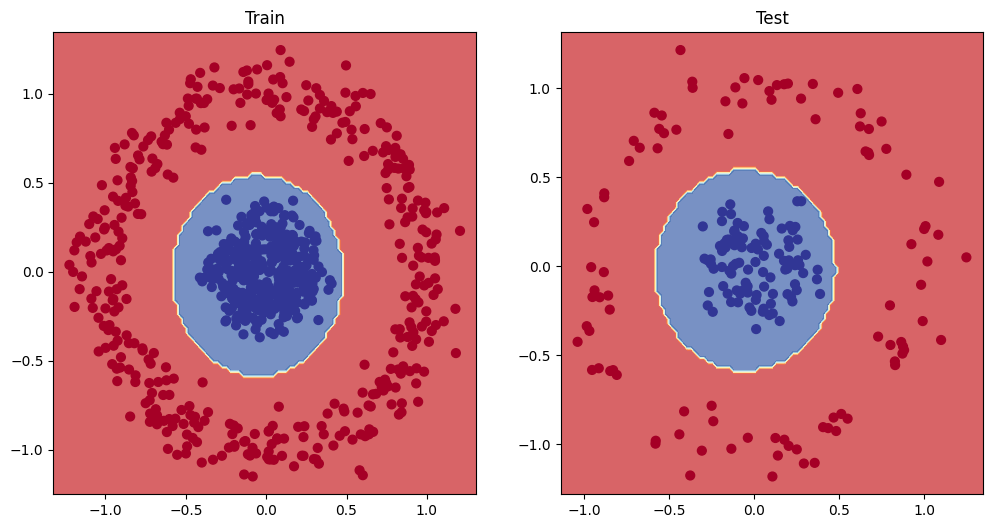

Epoch : 200 Loss : 0.4219478964805603 Accuracy : 100.0
Epoch : 200 Loss : 0.4219478964805603 Accuracy : 100.0


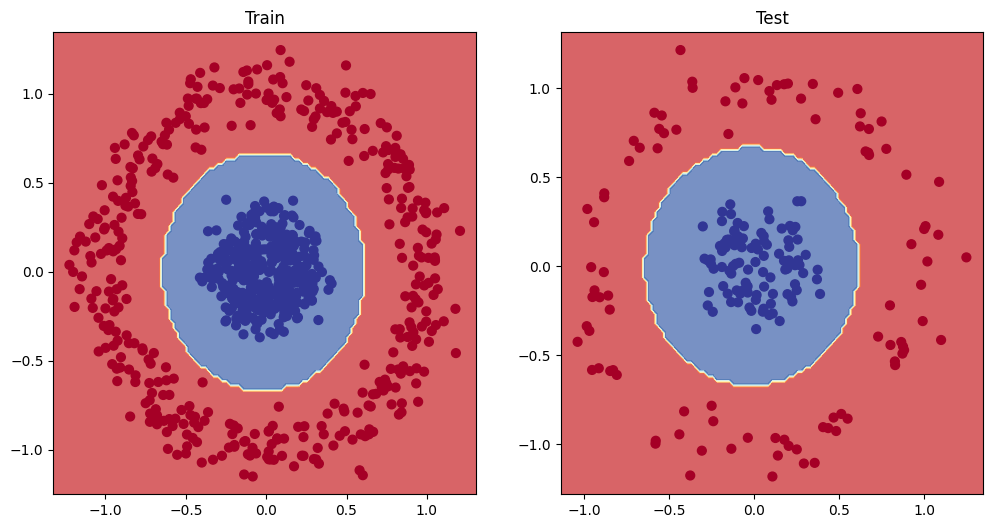

Epoch : 300 Loss : 0.3440321981906891 Accuracy : 100.0
Epoch : 300 Loss : 0.3440321981906891 Accuracy : 100.0


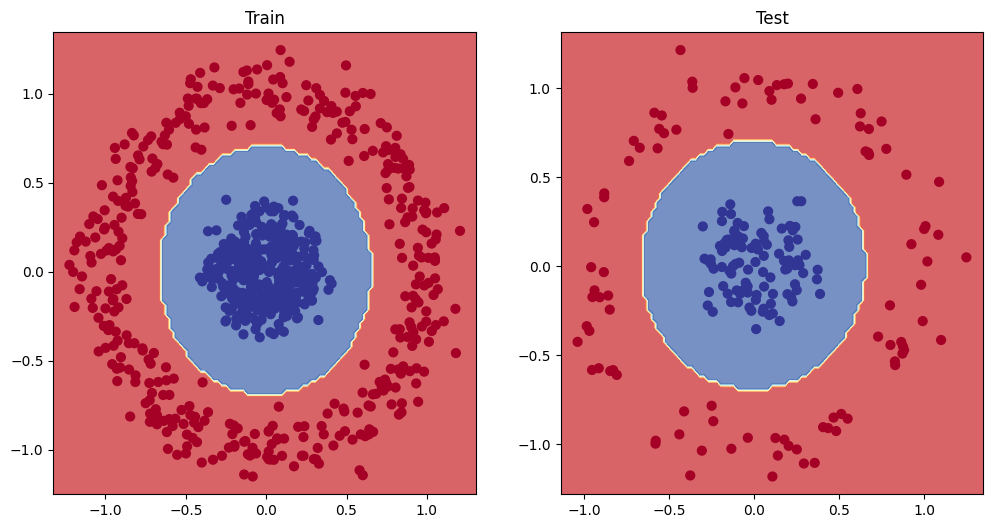

Epoch : 400 Loss : 0.2838062644004822 Accuracy : 100.0
Epoch : 400 Loss : 0.2838062644004822 Accuracy : 100.0


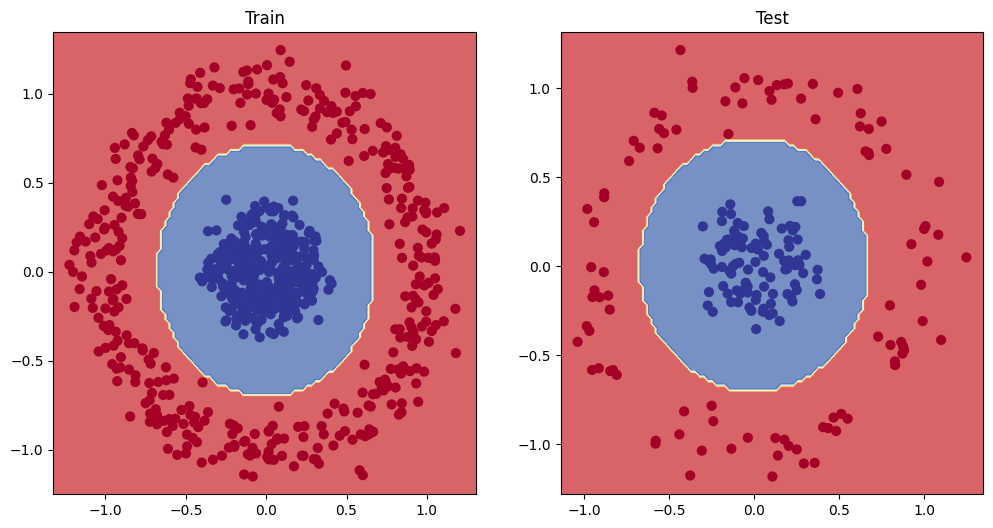

Epoch : 500 Loss : 0.2369580864906311 Accuracy : 100.0
Epoch : 500 Loss : 0.2369580864906311 Accuracy : 100.0


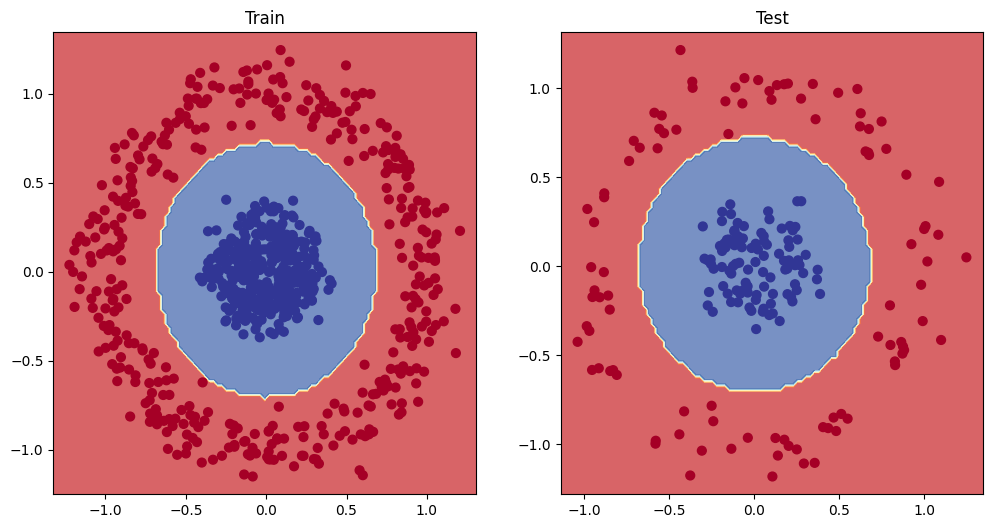

Epoch : 600 Loss : 0.20028720796108246 Accuracy : 100.0
Epoch : 600 Loss : 0.20028720796108246 Accuracy : 100.0


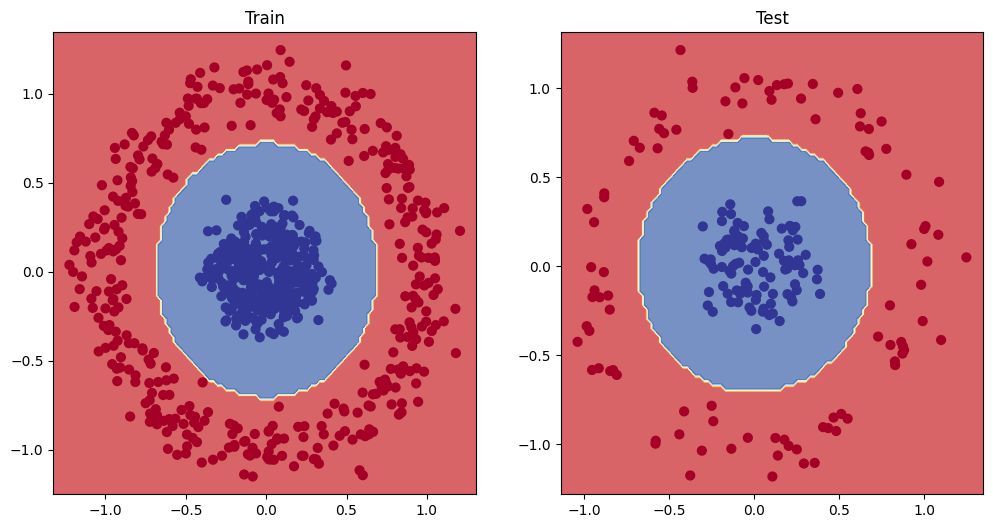

Epoch : 700 Loss : 0.1713504046201706 Accuracy : 100.0
Epoch : 700 Loss : 0.1713504046201706 Accuracy : 100.0


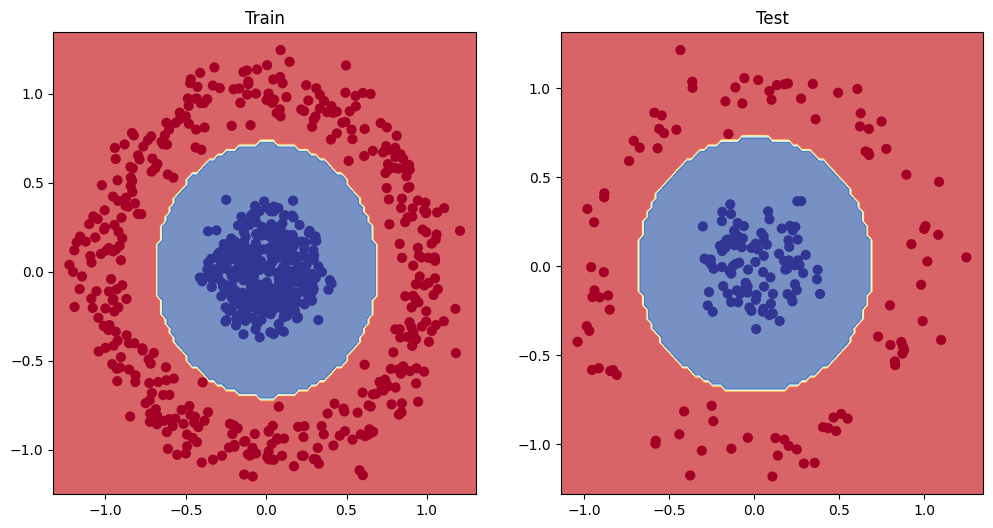

Epoch : 800 Loss : 0.1482921540737152 Accuracy : 100.0
Epoch : 800 Loss : 0.1482921540737152 Accuracy : 100.0


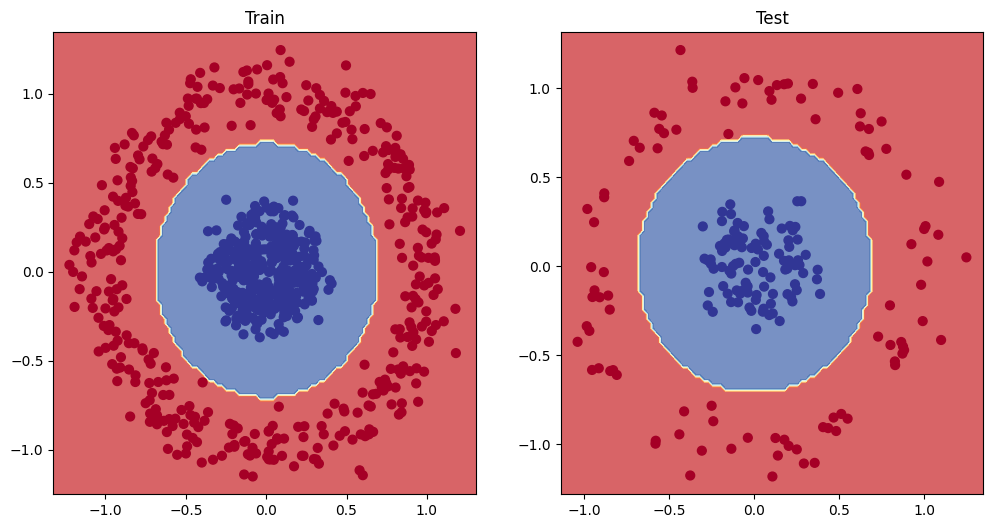

Epoch : 900 Loss : 0.12971818447113037 Accuracy : 100.0
Epoch : 900 Loss : 0.12971818447113037 Accuracy : 100.0


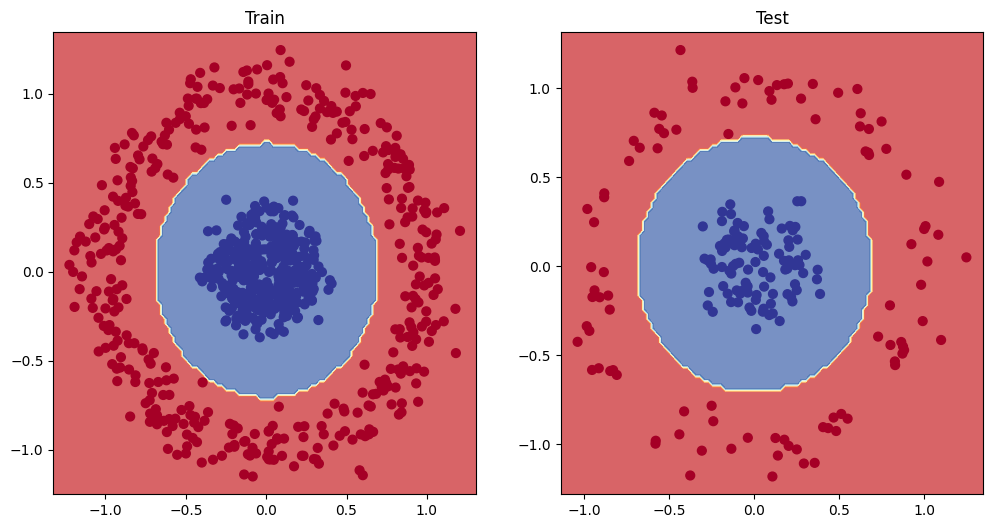

In [190]:
from helper_functions import plot_predictions, plot_decision_boundary
epochs = 1000

accuracy_path = []
test_accuracy_path = []
loss_path = []
test_loss_path = []

for epoch in range(epochs):

    
    #Forward pass
    logits = model_0(X_train_poly.to(device)).squeeze()
    prob = torch.sigmoid(logits)
    pred = torch.round(prob)
        
    #Calculate the loss
    loss = loss_fn(logits.squeeze(), y_train.to(device))
        
    #Backward pass
    loss.backward()

    #Step the optimizer
    optimizer.step()
    
    #Reset the gradients
    optimizer.zero_grad()
    
    #Calculate the accuracy
    accuracy_path.append(accuracy_fn(pred, y_train.to(device)))
    loss_path.append(loss.item())
    
    ##Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test_poly.to(device)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #Calculate the loss
        test_loss_path.append(loss_fn(test_logits.squeeze(), y_test.to(device)))
        test_accuracy_path.append(accuracy_fn(test_pred, y_test.to(device)))
    
    #Calculate the accuracy
    if epoch%100 == 0:
        acc = accuracy_fn(pred, y_train.to(device))
        print(f'Epoch : {epoch} Loss : {loss} Accuracy : {acc}')
        
    if epoch%100 == 0:
        print(f'Epoch : {epoch} Loss : {loss} Accuracy : {acc}')
        #Plot decision boundary
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.title("Train")
        plot_decision_boundary_mma(model_0, X_train_poly, y_train)
        plt.subplot(1,2,2)
        plt.title("Test")
        plot_decision_boundary_mma(model_0, X_test_poly, y_test)
        plt.show()

    

In [188]:
print(f'Loss Path: {loss_path[:10]}')
print(f'Loss Path: {loss_path_zeroatstart[:10]}')


Loss Path: [0.718851625919342, 0.7166744470596313, 0.7145102024078369, 0.712358832359314, 0.7102203369140625, 0.7080943584442139, 0.705980658531189, 0.7038794755935669, 0.7017903327941895, 0.6997131109237671]
Loss Path: [0.6641986966133118, 0.6627181768417358, 0.6612496972084045, 0.6597928404808044, 0.6583473682403564, 0.6569130420684814, 0.6554895639419556, 0.6540767550468445, 0.6526743173599243, 0.6512821316719055]


In [121]:
from helper_functions import plot_predictions, plot_decision_boundary

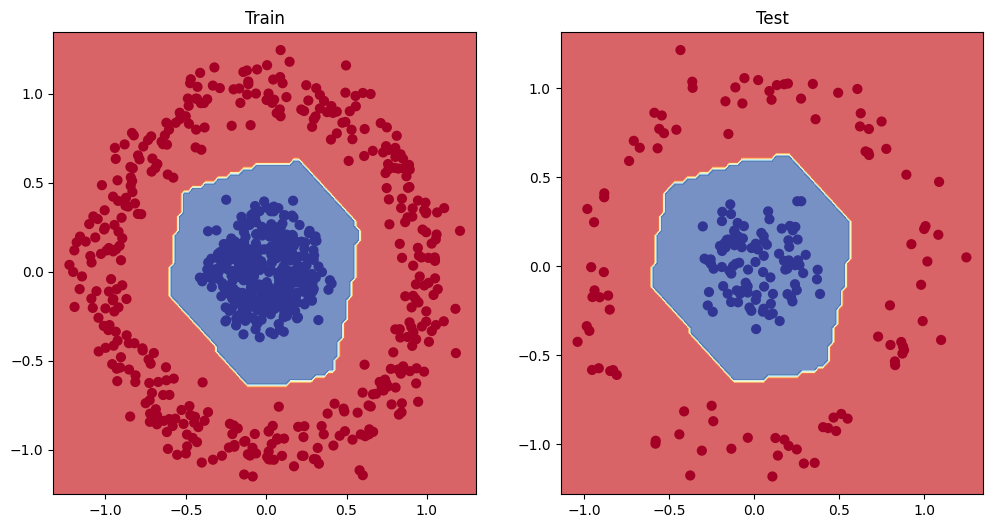

In [124]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective) 

Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**. 
>
> And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

We'll follow the same steps we did above but with a few changed hyperparameters.

### Non-Linear


In [191]:
# Replicate the model abouve using nn.Sequential()
model_3 = nn.Sequential(
    nn.Linear(in_features = 4, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 1)
).to(device)
model_0

loss_fn = nn.BCEWithLogitsLoss() #Binary cross entropy with logits
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)